In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
class MyLogisticRegression():
	def __init__(self, theta, alpha=0.01, max_iter=1000000):
		self.theta = theta
		self.alpha = alpha
		self.max_iter = max_iter

		if not isinstance(theta, np.ndarray) or not isinstance(alpha, float) or not isinstance(max_iter, int):
			return
		if alpha <= 0 or max_iter <= 0:
			return
		if theta.ndim != 2 or theta.shape[1] != 1:
			return

	def sigmoid_(self, x):
		if not isinstance(x, np.ndarray):
			return
		if x.size <= 0 or x.ndim != 2:
			return
		if x.shape[1] != 1:
			return

		return 1 / (1 + np.exp(-x))

	def predict_(self, x):
		if not isinstance(x, np.ndarray) or not isinstance(self.theta, np.ndarray):
			return
		if x.ndim != 2 or self.theta.ndim != 2:
			return
		if (self.theta.shape[0] != x.shape[1] + 1) or self.theta.shape[1] != 1:
			return

		m, n = x.shape

		X_prime = np.hstack((np.ones((m, 1)), x))

		y_hat = X_prime @ self.theta

		return self.sigmoid_(y_hat)

	
	def accuracy_(self, y, y_hat):
		if not isinstance(y, np.ndarray) or not isinstance(y_hat, np.ndarray):
			return
		if y.ndim != 2 or y_hat.ndim != 2:
			return
		if y.shape[1] != 1 or y.shape != y_hat.shape:
			return
		y_pred = np.where(y_hat >= 0.5, 1, 0)
		valid_fraction = np.mean(y_pred == y)	
		valid_pred = y[y_pred == y]
		return valid_fraction, valid_pred

	def loss_(self, y, y_hat, eps=1e-15):
		if not isinstance(y, np.ndarray) or not isinstance(y_hat, np.ndarray):
			return
		if not isinstance(eps, float):
			return
		if y.ndim != 2 or y_hat.ndim != 2:
			return
		if y.shape[1] != 1 or y.shape != y_hat.shape:
			return

		y_hat_safe = np.clip(y_hat, eps, 1 - eps)
		
		m, n = y.shape

		loss_1 = y.T @ np.log(y_hat_safe)
		loss_0 = (1 - y).T @ np.log(1 - y_hat_safe)
		loss_sum = loss_1 + loss_0

		return -(1 / m) * loss_sum

	def fit_(self, x, y):
		if not isinstance(x, np.ndarray) or not isinstance(y, np.ndarray):
			return
		if x.ndim != 2 or y.ndim != 2:
			return
		if y.shape[1] != 1 or y.shape[0] != x.shape[0]:
			return

		for i in range(self.max_iter):
			y_hat = self.predict_(x)

			""" if i % 10000 == 0:
				print(f"Iter {i}: Loss {self.loss_(y, y_hat)}") """
			error = y_hat - y

			m, n = x.shape
			X_prime = np.hstack((np.ones((m, 1)), x))

			gradient = (1 / m) * (X_prime.T @ error)

			self.theta -= self.alpha * gradient

In [3]:
def accuracy(y, y_hat):
	if not isinstance(y, np.ndarray) or not isinstance(y_hat, np.ndarray):
		return
	if y.ndim != 2 or y_hat.ndim != 2:
		return
	if y.shape[1] != 1 or y.shape != y_hat.shape:
		return
	y_pred = np.where(y_hat >= 0.5, 1, 0)
	valid_fraction = np.mean(y_pred == y)	
	valid_pred = y[y_pred == y]
	return valid_fraction, valid_pred

In [4]:
def minmax(X, x_min=None, x_max=None):
	if not isinstance(X, np.ndarray):
		return
	if X.size <= 0 or X.ndim != 2:
		return
	
	if x_min is None or x_max is None:
		x_min = X.min(axis=0)
		x_max = X.max(axis=0)	

	return (X - x_min) / (x_max - x_min), x_min, x_max

In [5]:
def data_splitter(X, Y, fraction=0.8):
	if not isinstance(X, np.ndarray) or not isinstance(Y, np.ndarray):
		return
	if not isinstance(fraction, float) or fraction <= 0 or fraction >= 1:
		return
	if X.ndim != 2 or Y.ndim != 2 or X.shape[0] != Y.shape[0] or Y.shape[1] != 1:
		return
	
	rng = np.random.default_rng(42)
	indices = np.arange(X.shape[0])
	rng.shuffle(indices)
	X_rand = X[indices]
	Y_rand = Y[indices]

	training_part = int(X.shape[0] * fraction)

	X_train = X_rand[:training_part]
	Y_train = Y_rand[:training_part]

	X_test = X_rand[training_part:]
	Y_test = Y_rand[training_part:]

	return (X_train, X_test, Y_train, Y_test)
	

In [23]:
def plot_model(X, Y, Y_hat):
	fig, axes = plt.subplots(3, 1, figsize=(6, 12))
	features_names = ["Weight", "Height", "Bone_Density"]

	#y_pred = np.where(Y_hat >= 0.5, 1, 0)

	for i in range(3):
		axes[i].scatter(X[:, i], Y, s=30, color="#1900FF")
		axes[i].scatter(X[:, i], Y_hat, s=6, color="#FFC17B")
		axes[i].set_xlabel(features_names[i])
		axes[i].set_ylabel("Planet")


In [7]:
def model_analysis(model, y, y_hat):
	loss = model.loss_(y, y_hat)
	print(loss)

	acc_pourcentage, acc_array = accuracy(y, y_hat)
	
	print(f"Valid/Total Prediction: {len(acc_array)}/{y_hat.shape[0]}")

	print(f"Pourcentage of valid prediction: {acc_pourcentage:.2f}%")

       Unnamed: 0  weight  height  bone_density
count      320.00  320.00  320.00        320.00
mean       159.50  111.85  224.30          1.16
std         92.52   41.33   45.58          0.55
min          0.00   38.20  120.03          0.02
25%         79.75   76.02  187.65          0.69
50%        159.50  113.89  229.67          1.14
75%        239.25  138.73  262.39          1.64
max        319.00  224.67  310.14          2.24
(256, 3) (64, 3)
(256, 1) (64, 1)
Model 0:
[[0.0579571]]
Valid/Total Prediction: 61/64
Pourcentage of valid prediction: 0.95%
Model 0 thetas: [[  1.04113552]
 [-67.61063255]
 [ 42.40079492]
 [-12.84803491]]

Model 1:
[[0.05168943]]
Valid/Total Prediction: 63/64
Pourcentage of valid prediction: 0.98%
Model 1 thetas: [[  2.71395692]
 [ -8.04715893]
 [-28.42850135]
 [ 23.18858359]]

Model 2:
[[0.00018576]]
Valid/Total Prediction: 64/64
Pourcentage of valid prediction: 1.00%
Model 2 thetas: [[-45.82389798]
 [ 32.42033158]
 [ 27.53572054]
 [ 20.7209927 ]]

Model 3:
[

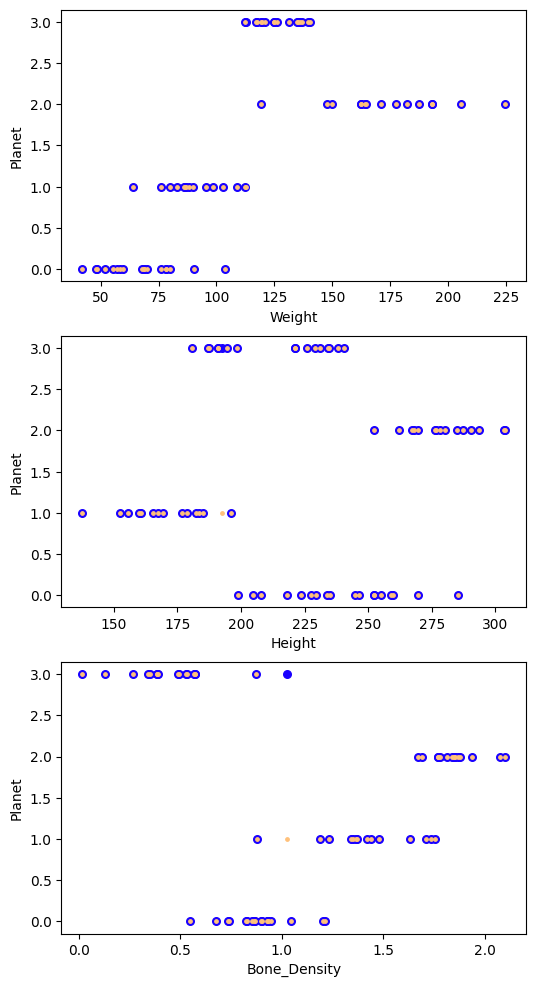

In [27]:
def mono_log(X_train_norm, Y_train_bin):
	nbr_features = X_train_norm.shape[1]

	#Init theta and create and train model
	theta = np.random.normal(0, 0.1, nbr_features + 1).reshape(-1, 1)

	model = MyLogisticRegression(theta, alpha=0.5,max_iter=1000000)

	model.fit_(X_train_norm, Y_train_bin)

	return model 


def multi_log(X, Y):
	#Split Data into training and testing set
	X_train, X_test, Y_train, Y_test = data_splitter(X, Y)
	print(X_train.shape, X_test.shape)
	print(Y_train.shape, Y_test.shape)

	#Normalize X_train and X_test
	X_train_norm, x_train_min, x_train_max = minmax(X_train)
	X_test_norm, _, _ = minmax(X_test, x_train_min, x_train_max)

	models = []
	y_hats = []

	#Train 4 Models (1 per zipcode)
	for zipcode in range(4):
		print(f"Model {zipcode}:")
		#Transform Y label into binary classification (1 for zipcode, 0 for the other)
		Y_train_bin = np.where(Y_train != zipcode, 0, 1)
		Y_test_bin = np.where(Y_test != zipcode, 0, 1)

		#Train Model
		model = mono_log(X_train_norm, Y_train_bin)
		y_hat = model.predict_(X_test_norm)
		model_analysis(model, Y_test_bin, y_hat)

		#Store model and its results
		models.append(model)
		y_hats.append(y_hat)
		print(f"Model {zipcode} thetas: {model.theta}\n")

	print(f"Final Model:\n")
	stacked_hats = np.array([y_hats[0].flatten(), y_hats[1].flatten(), y_hats[2].flatten(), y_hats[3].flatten()])
	y_hat_global = np.argmax(stacked_hats, axis=0).reshape(-1, 1)

	valid_pred = Y_test[Y_test == y_hat_global]
	print(f"Valid Prediciton: {len(valid_pred)} on {len(Y_test)}")

	results_stacked = np.array([y_hat_global.flatten(), Y_test.flatten()])
	print(results_stacked)

	plot_model(X_test, Y_test, y_hat_global)

def init_data():
	#Load Data
	try:
		data = pd.read_csv("solar_system_census.csv")
		data_planet = pd.read_csv("solar_system_census_planets.csv")
	except Exception as e:
		print("Error: Couldnt load CSV Data file")
		exit(1)
	#sns.pairplot(data)
	print(data.describe().round(2))

	#Create numpy array with the labeled data
	X = np.array([data["weight"], data["height"], data["bone_density"]]).T
	Y = np.array([data_planet["Origin"]]).reshape(-1, 1)

	multi_log(X, Y)


init_data()

       Unnamed: 0  weight  height  bone_density
count      320.00  320.00  320.00        320.00
mean       159.50  111.85  224.30          1.16
std         92.52   41.33   45.58          0.55
min          0.00   38.20  120.03          0.02
25%         79.75   76.02  187.65          0.69
50%        159.50  113.89  229.67          1.14
75%        239.25  138.73  262.39          1.64
max        319.00  224.67  310.14          2.24
(256, 3) (64, 3)
(256, 1) (64, 1)
Model 0:

[[0.0579571]]
Valid/Total Prediction: 61/64
Pourcentage of valid prediction: 0.95%


Model 1:

[[0.05168943]]
Valid/Total Prediction: 63/64
Pourcentage of valid prediction: 0.98%


Model 2:

[[0.00018576]]
Valid/Total Prediction: 64/64
Pourcentage of valid prediction: 1.00%


Model 3:

[[0.06088979]]
Valid/Total Prediction: 63/64
Pourcentage of valid prediction: 0.98%


Final Model:

Valid Prediciton: 63 on 64
[[0. 3. 2. 3. 0. 0. 2. 3. 1. 3. 1. 1. 0. 3. 3. 2. 3. 3. 0. 1. 1. 2. 3. 3.
  3. 0. 0. 0. 2. 1. 2. 1. 2. 0. 2. 0

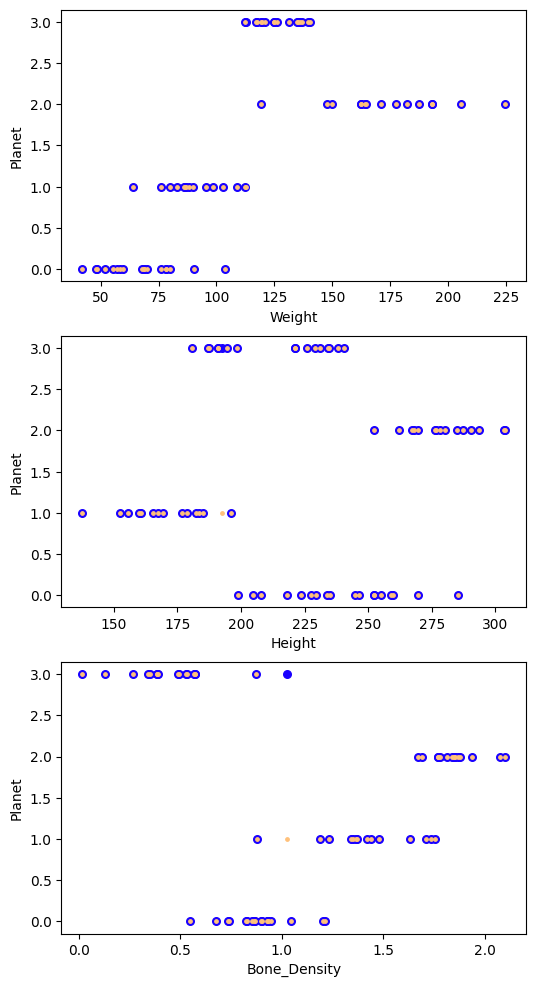

In [25]:
#Code with the right thetas to not have to retrain the models
try:
	data = pd.read_csv("solar_system_census.csv")
	data_planet = pd.read_csv("solar_system_census_planets.csv")
except Exception as e:
	print("Error: Couldnt load CSV Data file")
	exit(1)
#sns.pairplot(data)
print(data.describe().round(2))

#Create numpy array with the labeled data
X = np.array([data["weight"], data["height"], data["bone_density"]]).T
Y = np.array([data_planet["Origin"]]).reshape(-1, 1)

#Split Data into training and testing set
X_train, X_test, Y_train, Y_test = data_splitter(X, Y)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

#Normalize X_train and X_test
X_train_norm, x_train_min, x_train_max = minmax(X_train)
X_test_norm, _, _ = minmax(X_test, x_train_min, x_train_max)

model_0 = MyLogisticRegression(np.array([[  1.0411372 ], [-67.61064819], [ 42.40080336], [-12.84803926]]))
model_1 = MyLogisticRegression(np.array([[  2.71395692], [ -8.04715893], [-28.42850135], [ 23.18858359]]))
model_2 = MyLogisticRegression(np.array([[-45.82389584], [ 32.42032845], [ 27.53571938], [ 20.72099283]]))
model_3 = MyLogisticRegression(np.array([[  5.16000601], [ 40.47740619], [ -6.16231161], [-53.98447794]]))

models = [model_0, model_1, model_2, model_3]
y_hats = []

for zipcode in range(4):
	print(f"Model {zipcode}:\n")
	Y_test_bin = np.where(Y_test != zipcode, 0, 1)
	y_hat = models[zipcode].predict_(X_test_norm)
	model_analysis(models[zipcode], Y_test_bin, y_hat)
	#plot_model(X_test, Y_test_bin, y_hat)
	y_hats.append(y_hat)
	print("\n")


print(f"Final Model:\n")
stacked_hats = np.array([y_hats[0].flatten(), y_hats[1].flatten(), y_hats[2].flatten(), y_hats[3].flatten()])
y_hat_global = np.argmax(stacked_hats, axis=0).reshape(-1, 1)

valid_pred = Y_test[Y_test == y_hat_global]
print(f"Valid Prediciton: {len(valid_pred)} on {len(Y_test)}")

results_stacked = np.array([y_hat_global.flatten(), Y_test.flatten()])
print(results_stacked)

plot_model(X_test, Y_test, y_hat_global)

#Print Accuracy
#acc_pourcentage, acc_array = accuracy(Y_test, y_hat_global)

#print(f"Valid/Total Prediction: {len(acc_array)}/{y_hat.shape[0]}")

#print(f"Pourcentage of valid prediction: {acc_pourcentage:.2f}%")
